In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip


In [2]:
df=pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [3]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
output=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
res_df1=df.loc[(df['toxic'] == 1) | (df['severe_toxic'] == 1) | (df['obscene'] == 1) | (df['threat'] == 1) | (df['insult'] == 1) | (df['identity_hate'] == 1)] 
res_df1.loc[:,'label'] = 1
res_df2=df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)] 
res_df2.loc[:,'label'] = 0
df=res_df1.append(res_df2)
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,43bdec470d62327e,"copy right \ndear Ironholds,\n\nThe Owner will...",0,0,0,0,0,0,0
1,c6b921252e079ce3,"""\nHow would you suggest it be split? I agree ...",0,0,0,0,0,0,0
2,0c715f68749d2ee3,"""\n\n A barnstar for you! \n\n The Flaming Co...",0,0,0,0,0,0,0
3,549e1245d669694b,do you fuck that dog??????????????????????????...,1,1,1,0,1,0,1
4,25f497249d122788,"Mel, I think you get the picture now. David ...",0,0,0,0,0,0,0


Text(0.5, 1.0, 'Count of labels')

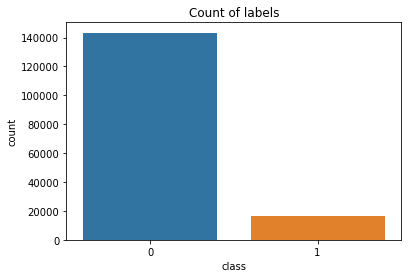

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.label)
plt.xlabel('class')
plt.title('Count of labels')

In [6]:
import nltk
temp_df=pd.DataFrame()
ls=[]
def token_after_clean(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokenized_text = tokenizer.tokenize(text)
    ls.append(tokenized_text)
    return tokenized_text


df['comment_text']=df['comment_text'].apply(str).apply(lambda x: token_after_clean(x))



In [7]:
from gensim.models import FastText
model = FastText(size=150, window=3, min_count=1)
model.build_vocab(sentences=df.comment_text)
model.train(sentences=df.comment_text, total_examples=len(df.comment_text), epochs=5)  # train

In [8]:
vocabulary = model.wv.vocab
len(vocabulary)

235625

In [9]:
model.wv['sahib']

array([ 0.15353313,  0.22225057, -0.4850706 ,  0.37155917,  0.36538714,
       -0.15001972,  0.603259  ,  0.44593713,  0.04664542, -0.08544977,
        0.47053912, -0.39201176, -0.30935287, -0.01314561, -0.10324519,
       -0.2536968 , -0.28694466,  0.16796057,  0.04816199,  0.19117333,
        0.2376158 ,  0.05161037, -0.06523164,  0.09202821, -0.65351325,
        0.0520625 , -1.0934544 , -0.11915109, -0.42683107,  0.2686748 ,
       -0.31066906, -0.20939109, -0.5874991 ,  0.34148416,  0.08151492,
        0.17904347, -0.15664737,  0.1477459 ,  0.16596913, -0.03884402,
       -0.5050489 ,  0.1500897 ,  0.28202212,  0.34886637,  0.23376688,
       -0.34218672, -0.02100494,  0.07404958, -0.55984724, -0.2012291 ,
        0.09200148, -0.27449074, -0.02110112, -0.42839542, -0.35540396,
       -0.1729313 ,  0.04352761, -0.6019165 ,  0.18384434,  0.25825468,
        0.11334257, -0.6768039 , -0.53293586,  0.01626423,  0.05328805,
        0.6290163 , -0.04365147,  0.18134335,  0.03099759, -0.25

In [10]:
model.save("/kaggle/working/fasttext.model")

In [11]:
# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 5000. each is of 150 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.079s...
[t-SNE] Computed neighbors for 5000 samples in 9.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.036976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.204010
[t-SNE] KL divergence after 1000 iterations: 1.938099


In [12]:

def l2_norm(x):
    return np.sqrt(np.sum(x**2))

def div_norm(x):
    norm_value = l2_norm(x)
    if norm_value > 0:
        return x * ( 1.0 / norm_value)
    else:
        return x
    
final_vector=[]
def sentence_builder(ls):
    for i in ls:

        fast_sentence=0
        for j in i:
            v1=model.wv[str(j)]
            fast_sentence+=div_norm(v1)
        sentence_vector=(fast_sentence)/len(i)
        final_vector.append(sentence_vector)
    return final_vector

k=sentence_builder(ls) # ls is the lsit we developed earlier    

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(k, df['label'])

Using TensorFlow backend.


In [14]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 143346, 1: 143346})


In [15]:
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
# # Create regularization penalty space
# penalty = ['l1', 'l2']

# # Create regularization hyperparameter space
# C = np.logspace(0, 4, 10)

# # Create hyperparameter options
# hyperparameters = dict(C=C, penalty=penalty)

In [17]:
# # Create grid search using 5-fold cross validation
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# logistic=LogisticRegression(max_iter=1000,solver='liblinear') # solver we used resolved our issue to find L1 normalisation or L2 normalisation
# clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [18]:
# # Fit grid search
# best_model = clf.fit(Xw_train, yw_train)

In [19]:
# # View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

## After running above 4 cells we got C=4 and penalty =l2

In [20]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000,solver='liblinear',C=4,penalty='l2')

In [21]:
clf.fit(Xw_train, yw_train)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predicted_res=clf.predict(Xw_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(yw_test,predicted_res)
accuracy

0.8798948934982792